# Importamos las librerias que se necesitan para el desarrollo de este algoritmo


In [120]:
# Para el analisis de datos
import numpy                 as np
import pandas                as pd
# Para las graficas
import matplotlib.pyplot     as plt
import seaborn               as sns
import plotly.graph_objects  as go
import plotly.express as px
# Para tratar los datos nulos
import missingno as msno
# Algunas librerias de colab librerias
# En caso de necesitar importar de drive
from google.colab import drive
# Para la construcción red neuronal
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# Para el test de la red neuronal
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# Para para leer el csv
import io 

In [121]:
# Importando el documento
df = pd.read_csv('/content/Saber_11__2020-2.csv')
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47.0,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43.0,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO


# Se observan cuales son los tipos de datos (columnas) que componene al archivo original

In [122]:
df.columns # Imprime el titulo de las columnas del archivo

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [123]:
# imprime los 5 primeros datosy los 5 ultimos datos  
# para observar que contienen las columnas
df.head().append(df.tail())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47.0,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43.0,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO
157305,TI,COLOMBIA,M,02/12/2004 12:00:00 AM,20204,SB11202040188996,ESTUDIANTE,COLOMBIA,No,BOLIVAR,...,45.0,50,A-,197,16,46.654899,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
157306,CC,COLOMBIA,F,08/05/2001 12:00:00 AM,20204,SB11202040405724,ESTUDIANTE,COLOMBIA,No,BOLIVAR,...,42.0,39,A-,178,6,43.866837,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
157307,TI,COLOMBIA,F,11/22/2003 12:00:00 AM,20204,SB11202040406187,ESTUDIANTE,COLOMBIA,No,BOLIVAR,...,35.0,10,A-,195,14,49.369623,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
157308,TI,COLOMBIA,M,03/29/2003 12:00:00 AM,20204,SB11202040186885,ESTUDIANTE,COLOMBIA,No,BOLIVAR,...,38.0,23,A-,189,11,43.862792,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
157309,CR,COLOMBIA,M,07/04/2002 12:00:00 AM,20204,SB11202040283029,ESTUDIANTE,COLOMBIA,No,BOLIVAR,...,42.0,39,A-,172,4,43.295531,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


# Pasamos a obtener las columnas de nuestro interes


In [124]:
# Seleccion de las columnas con los datos de nuestro interes
cols = ["ESTU_DEPTO_RESIDE",
"ESTU_MCPIO_RESIDE",
"FAMI_ESTRATOVIVIENDA",
"FAMI_EDUCACIONPADRE",
"FAMI_EDUCACIONMADRE",
"FAMI_TIENEINTERNET",
"FAMI_TIENECOMPUTADOR",
"ESTU_DEDICACIONLECTURADIARIA",
"ESTU_DEDICACIONINTERNET",
"ESTU_HORASSEMANATRABAJA",
"COLE_NATURALEZA",
"COLE_BILINGUE",
"PUNT_GLOBAL",]
# Creacion del dataframe que contiene lo anterior
df_filtered = df[cols]

In [125]:
# Mostrar los tipos de datos
df_filtered.dtypes

ESTU_DEPTO_RESIDE               object
ESTU_MCPIO_RESIDE               object
FAMI_ESTRATOVIVIENDA            object
FAMI_EDUCACIONPADRE             object
FAMI_EDUCACIONMADRE             object
FAMI_TIENEINTERNET              object
FAMI_TIENECOMPUTADOR            object
ESTU_DEDICACIONLECTURADIARIA    object
ESTU_DEDICACIONINTERNET         object
ESTU_HORASSEMANATRABAJA         object
COLE_NATURALEZA                 object
COLE_BILINGUE                   object
PUNT_GLOBAL                      int64
dtype: object

# Obtenemos los valores de las columnas seleccionadas
Esto se hace con el fin de identificar:
* Posibles categorias
* Datos inconsistentes
* Datos nulos 
* Errores de codificacion

In [ ]:
print_unique_values(df_filtered)

Por medio del describe vemos la infromacion general de los puntajes globales:

* Promedio = 250
* Puntaje minimo = 0
* Puntaje maximo = 500

<br>El resto de datos son la desviación estandar y los cuartiles

In [126]:
df_filtered['PUNT_GLOBAL'].describe()

count    157310.000000
mean        243.007628
std          47.627922
min           0.000000
25%         207.000000
50%         239.000000
75%         275.000000
max         492.000000
Name: PUNT_GLOBAL, dtype: float64

In [127]:
len(df_filtered[df_filtered['PUNT_GLOBAL'] < 100]['PUNT_GLOBAL'])

89

# Tenemos que manejar los datos nulos
Ya que notamos que se hay columnas con '-' o 'nan' por dato, es decir, un dato nuelo, para ello lo cambiamos a None

In [128]:
# Transforma "-"" y "nan" por None
replace_dic ={
    float('nan'):None,
    '-':None
}

df_filtered.replace(replace_dic, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# La cantidad de datos que hay por columna (en porcentaje), para que de igual forma, nos podemos hacer idea de cuantos datos nulos hay

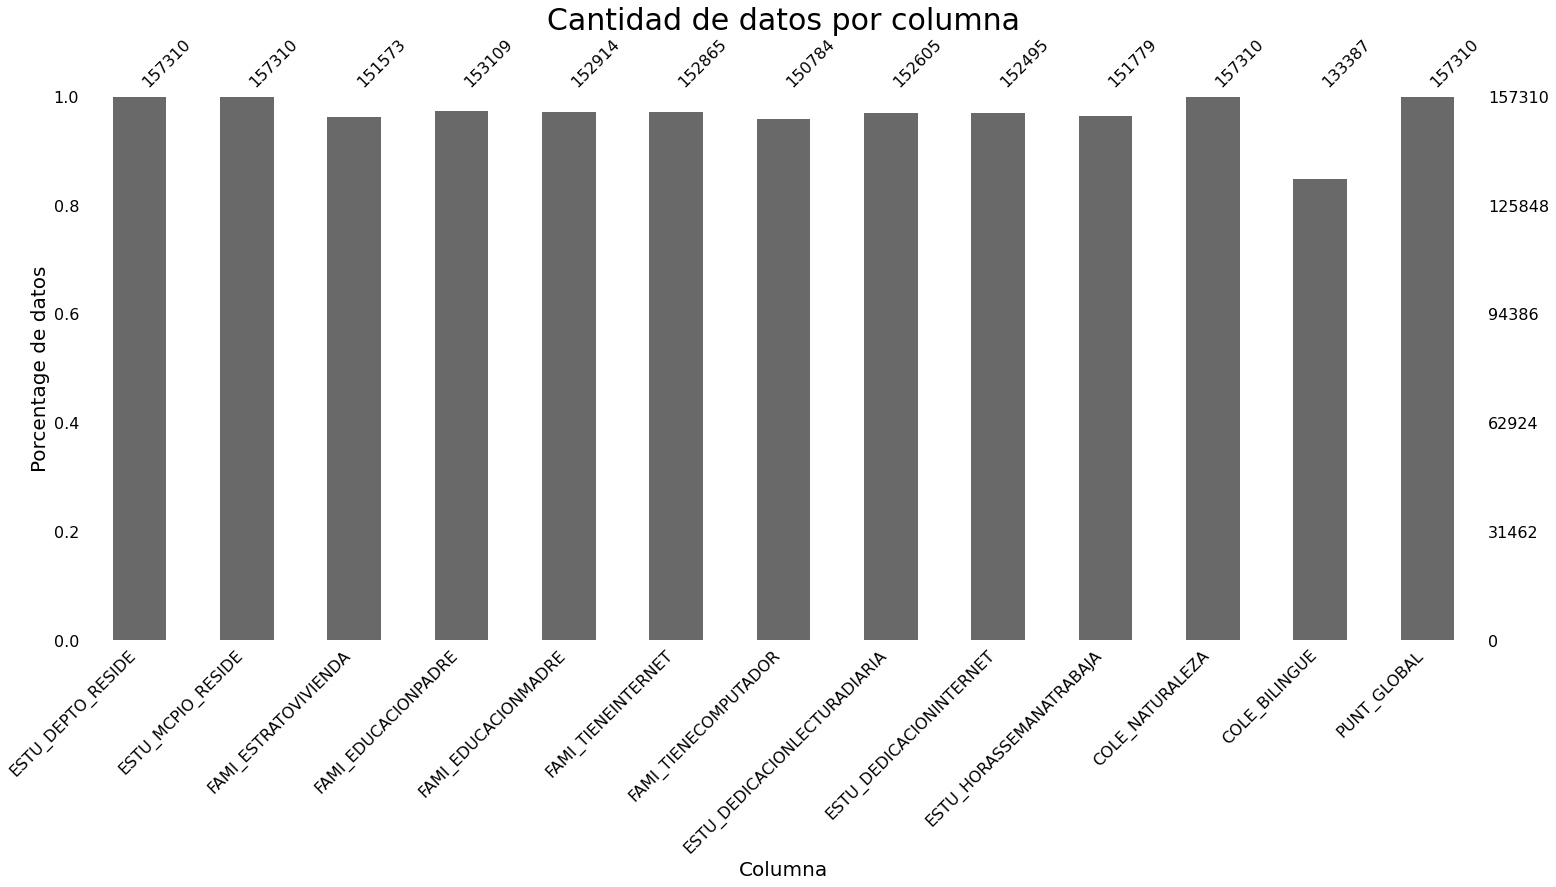

In [129]:
plt.xlabel('Columna', fontsize=20) 
plt.ylabel('Porcentage de datos', fontsize=20) 
plt.title("Cantidad de datos por columna",fontsize=30)
msno.bar(df_filtered)

# Pasamos a eliminar las filas que contengan datos nulos, para que no ocurran problemas mas adelante.

In [130]:
#Elimina las filas con datos faltantes
df_filtered.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Notamos que se puede unir el departamento y el municipio en un solo item, en esta caso

In [131]:
df_filtered['ESTU_LUG_RESIDE'] = df_filtered['ESTU_DEPTO_RESIDE'] + '-' + df_filtered['ESTU_MCPIO_RESIDE']
df_filtered['ESTU_LUG_RESIDE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                 CUNDINAMARCA-CAJICÁ
1                 CUNDINAMARCA-CAJICÁ
2                 CUNDINAMARCA-CAJICÁ
3                 CUNDINAMARCA-CAJICÁ
4                 CUNDINAMARCA-CAJICÁ
                     ...             
157299                  VALLE-FLORIDA
157300                  VALLE-PALMIRA
157301    BOLIVAR-CARTAGENA DE INDIAS
157302    BOLIVAR-CARTAGENA DE INDIAS
157303    BOLIVAR-CARTAGENA DE INDIAS
Name: ESTU_LUG_RESIDE, Length: 124418, dtype: object

# Se pasa a realiar la codigficacion de los datos acorde a los puntajes

In [132]:
def encode_punt_global(punt):
  """
    Función usada para codificar el puntaje global con nuestros rangos definidos
  """
  label = 0 #numero 0 puntajes de 0 a 100
  if punt > 100 and punt <= 200: #numero 1 puntajes de 101 a 200
    label = 1
  elif punt > 200 and punt <= 300: #numero 2 puntajes de 201 a 300
    label = 2
  elif punt > 300 and punt <= 400: #numero 3 puntajes de 301 a 400
    label = 3
  elif punt > 400 and punt <= 500: #numero 4 puntajes de 401 a 500
    label = 4
  return label

In [133]:
# codificamos las columnas
df_encoded = df_filtered\
    .loc[#seleccionamos las columnas
         :,~df_filtered.sort_values(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE'])# Ordenamos el dataframe por departamento y municipio
            .columns.isin(['PUNT_GLOBAL', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE'])# filtramos las columnas que no esten en la lista
    ].apply(LabelEncoder().fit_transform)# aplicamos la codificacion a las columnas seleccionadas

# codificamos el puntaje global con nuestros rangos definidos
df_encoded['PUNT_GLOBAL'] = df_filtered['PUNT_GLOBAL'].apply(encode_punt_global)

# Dataframe resultante
df_encoded

,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NATURALEZA,COLE_BILINGUE,ESTU_LUG_RESIDE,PUNT_GLOBAL
0,1,10,0,1,1,0,3,0,1,0,480,2
1,2,8,0,1,0,4,3,1,1,0,480,2
2,0,7,9,0,0,2,0,0,1,0,480,3
3,6,9,0,1,0,0,1,0,1,0,480,2
4,4,8,0,1,1,1,1,3,1,0,480,2
...,...,...,...,...,...,...,...,...,...,...,...,...
157299,1,1,6,1,1,2,3,0,1,0,965,3
157300,1,8,0,1,1,2,1,0,1,0,974,2
157301,0,8,8,0,0,2,3,0,1,0,150,1
157302,0,4,10,0,1,2,1,1,1,0,150,2


# Se pasa a realizar la verificacion de la codificación de los valores en las tablas

In [134]:
#Unimos la tabla codificada con la tabla con valores sin codificar, esto con el fin de 
#poder comparar directamente los valores codificados y sin codificar
df_merged = pd.merge(df_filtered, df_encoded, suffixes=('', '_ENC'), left_index=True, right_index=True)

In [135]:
for col in df_encoded.columns:
  print('------------------------------------------------')
  print(df_merged[[col, f'{col}_ENC']].sort_values(f'{col}_ENC').drop_duplicates())
  print('------------------------------------------------')

------------------------------------------------
       FAMI_ESTRATOVIVIENDA  FAMI_ESTRATOVIVIENDA_ENC
157303            Estrato 1                         0
155581            Estrato 2                         1
20967             Estrato 3                         2
130825            Estrato 4                         3
51767             Estrato 5                         4
83123             Estrato 6                         5
20108           Sin Estrato                         6
------------------------------------------------
------------------------------------------------
                         FAMI_EDUCACIONPADRE  FAMI_EDUCACIONPADRE_ENC
78211         Educación profesional completa                        0
57199       Educación profesional incompleta                        1
19838                                Ninguno                        2
46659                              No Aplica                        3
66922                                No sabe                        4
6

# Se hace la construccion de la red neuronal, la cual fue
basada de: https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

## Preprosesamiento
### Seleccionamos las columnas de entradas y salida

In [136]:
# define las columnas de entradas y salida de la red neuronal
cols_input = [
"ESTU_LUG_RESIDE",
"FAMI_ESTRATOVIVIENDA",
"FAMI_EDUCACIONPADRE",
"FAMI_EDUCACIONMADRE",
"FAMI_TIENEINTERNET",
"FAMI_TIENECOMPUTADOR",
"ESTU_DEDICACIONLECTURADIARIA",
"ESTU_DEDICACIONINTERNET",
"ESTU_HORASSEMANATRABAJA",
"COLE_NATURALEZA",
"COLE_BILINGUE",
]
input = df_encoded[cols_input]
output = df_encoded['PUNT_GLOBAL']

### Definimos los grupos de entrenamiento y prueba
Para este caso usamos uando un
80% de los datos para entrenamiento y un 20% de los datos para las pruebas

In [137]:
#Conjuntos de entrenamiento 80%
input_train = input.head(round(input.shape[0]*0.8))
output_train = output.head(round(output.shape[0]*0.8))
#Conjuntos de prueba 20%
input_test = input.drop(input_train.index)
output_test = output.drop(output_train.index)

### Estandarización de los datos
Para esto usamos standar scaler:
https://interactivechaos.com/es/manual/tutorial-de-machine-learning/standard-scaler

In [138]:
sc = StandardScaler()

scaler = sc.fit(input_train)
input_train_scaled = scaler.transform(input_train)
input_test_scaled = scaler.transform(input_test)

Se pasa de a hacer la construccion y entrenamiento de la red neuronal de clasificación

In [139]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),
                        max_iter = 100,#Numero de épocas de prueba
                        activation = 'relu',# https://datascience.eu/es/aprendizaje-automatico/funcion-de-activacion-relu/
                        solver = 'adam')#https://youtu.be/QFys1W2NAAc 

In [140]:
mlp.fit(input_train_scaled, output_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=100)

# Evaluacion del modelo

In [153]:
y_pred = mlp.predict(input_test_scaled)

In [143]:
#Matrix de Confusion la cual describe el desempeño del modelo de clasificacion basado en valores verdaderos conocidos
from sklearn.metrics import confusion_matrix
matriz =confusion_matrix(output_test,y_pred)
print(matriz)

[[  494  3750    17     0]
 [  505 16319   311     0]
 [   23  2972   459     0]
 [    0    21    13     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


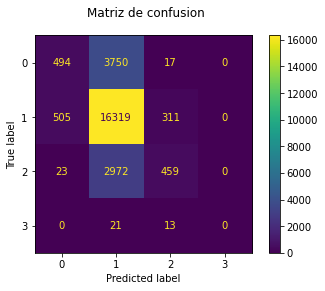

In [144]:
fig = plot_confusion_matrix(mlp, input_test_scaled,output_test, display_labels=mlp.classes_)

fig.figure_.suptitle("Matriz de confusion")
plt.show()

In [145]:
# Mide la exactitud de la clasificación de los datos
print('Exactitud: {}'.format(accuracy_score(output_test, y_pred)))

Exactitud: 0.6941006269088571


In [146]:
# Mide de la precisión de la clasificación de los datos
print('Precision global: {:.2f}'.format(precision_score(output_test, y_pred,average='micro')))
print('Precision por etiqueta media no ponderada: {:.2f}'.format(precision_score(output_test, y_pred,average='macro',zero_division=0)))
print('Precision por etiqueta ponderado: {:.2f}'.format(precision_score(output_test, y_pred,average='weighted',zero_division=0)))
print('Precision de cada clase:',precision_score(output_test, y_pred,average=None,zero_division=0))

Precision global: 0.69
Precision por etiqueta media no ponderada: 0.44
Precision por etiqueta ponderado: 0.65
Precision de cada clase: [0.48336595 0.70761426 0.57375    0.        ]


In [147]:
# Mide de la Sensibilidad (recall) de la clasificación de los datos
print('Sensibilidad global: {:.2f}'.format(recall_score(output_test, y_pred,average='micro')))
print('Sensibilidad por etiqueta media no ponderada: {:.2f}'.format(recall_score(output_test, y_pred,average='macro')))
print('Sensibilidad por etiqueta ponderado: {:.2f}'.format(recall_score(output_test, y_pred,average='weighted')))
print('Sensibilidad por clase ',(recall_score(output_test, y_pred,average=None)))

Sensibilidad global: 0.69
Sensibilidad por etiqueta media no ponderada: 0.30
Sensibilidad por etiqueta ponderado: 0.69
Sensibilidad por clase  [0.11593523 0.95237817 0.1328894  0.        ]


In [148]:
# Calcula la puntuacion F1 de la clasificación de los datos
print('Punt. F1 global: {:.2f}'.format(f1_score(output_test, y_pred,average='micro')))
print('Punt. F1 por etiqueta media no ponderada: {:.2f}'.format(f1_score(output_test, y_pred,average='macro')))
print('Punt. F1 por etiqueta ponderado: {:.2f}'.format(f1_score(output_test, y_pred,average='weighted')))
print('Punt. F1 por clase ',(f1_score(output_test, y_pred,average=None)))

Punt. F1 global: 0.69
Punt. F1 por etiqueta media no ponderada: 0.30
Punt. F1 por etiqueta ponderado: 0.62
Punt. F1 por clase  [0.18701495 0.81195114 0.2157969  0.        ]


In [149]:
from sklearn.linear_model import Ridge


In [150]:
print(type(input_train), type(output_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [151]:
ridge = Ridge(alpha=0.2).fit(input_train, output_train)
print(f"Ridge Regression-Training set score: {ridge.score(input_train, output_train)}")
print(f"Ridge Regression-Test set score: {ridge.score(input_test, output_test)}")

Ridge Regression-Training set score: 0.11385566880871612
Ridge Regression-Test set score: 0.11275838960225648
